In [1]:
import pandas as pd ;
merged_df = pd.read_csv('merged_kickstarter_data.csv')
merged_df.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,video
0,149,Funding the physical release of my NEW 5-song ...,"{""id"":40,""name"":""Indie Rock"",""analytics_name"":...",6251.0,US,the United States,1466447593,"{""id"":536141083,""name"":""Craig Bidiman"",""slug"":...",USD,$,...,True,False,successful,1469847602,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,6251.000000,international,"{""id"":683479,""status"":""successful"",""hls"":null,..."
1,11,I'm a Single Air Force Veteran & there are no ...,"{""id"":342,""name"":""Web"",""analytics_name"":""Web"",...",549.0,US,the United States,1406383924,"{""id"":856836724,""name"":""Tara Broadway (deleted...",USD,$,...,True,False,successful,1410790320,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,549.000000,international,NaN
2,31,The debate rages on: Hard G or soft G? Let's p...,"{""id"":342,""name"":""Web"",""analytics_name"":""Web"",...",189.0,US,the United States,1405635865,"{""id"":1172118120,""name"":""Scott Sackville"",""is_...",USD,$,...,True,False,successful,1409210814,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,189.000000,international,"{""id"":418233,""status"":""successful"",""hls"":null,..."
3,3,Pilot show shot in Pompeii. Working title is S...,"{""id"":303,""name"":""Television"",""analytics_name""...",53.0,GB,the United Kingdom,1538245810,"{""id"":930935040,""name"":""Leo Bonomo"",""is_regist...",GBP,£,...,False,False,canceled,1540385659,1.311154,"{""web"":{""project"":""https://www.kickstarter.com...",1.298499,53.757308,international,"{""id"":913687,""status"":""successful"",""hls"":""http..."
4,1,Kim Konnects is an Afro-Caribbean TV show that...,"{""id"":303,""name"":""Television"",""analytics_name""...",0.0,CA,Canada,1534212812,"{""id"":1226905652,""name"":""Kimberly Douglas"",""is...",CAD,$,...,False,False,canceled,1536556503,0.760131,"{""web"":{""project"":""https://www.kickstarter.com...",0.758446,0.980569,international,"{""id"":902944,""status"":""successful"",""hls"":""http..."


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Check for missing values
missing_values = merged_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for duplicate rows
duplicate_rows = merged_df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)

# Summary statistics
summary_stats = merged_df.describe()
print("\nSummary Statistics:")
print(summary_stats)

Missing Values:
backers_count                  0
blurb                          1
category                       0
converted_pledged_amount     690
country                        0
country_displayable_name       0
created_at                     0
creator                        0
currency                       0
currency_symbol                0
currency_trailing_code         0
current_currency               0
deadline                       0
disable_communication          0
fx_rate                        0
goal                           0
id                             0
is_disliked                    0
is_launched                    0
is_liked                       0
is_starrable                   0
launched_at                    0
location                       6
name                           0
percent_funded                 0
photo                          0
pledged                        0
prelaunch_activated            0
profile                        0
slug                       

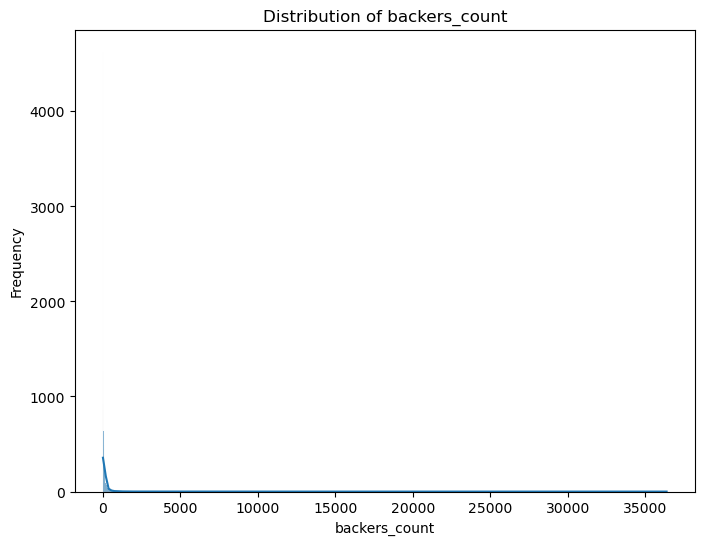

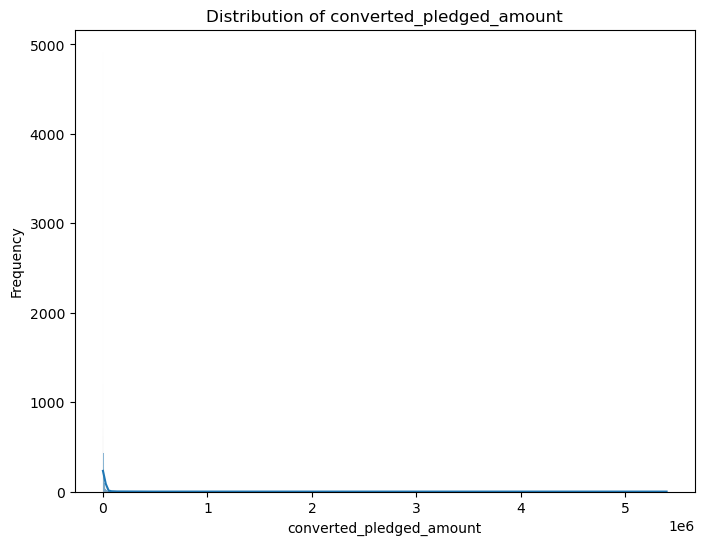

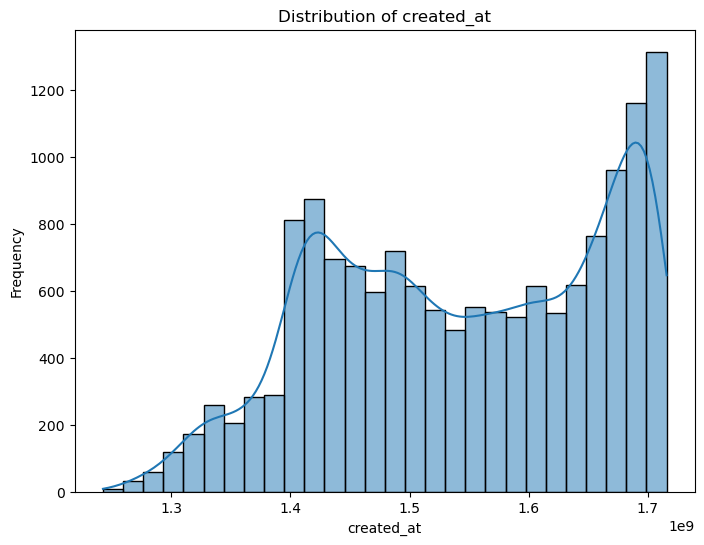

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


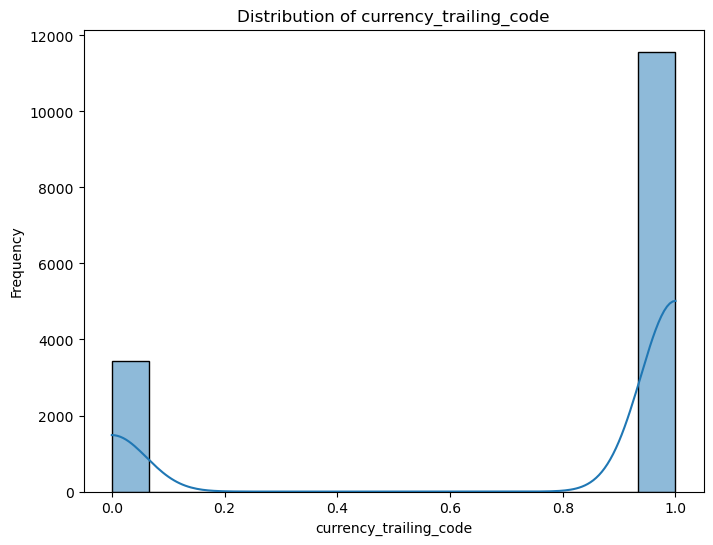

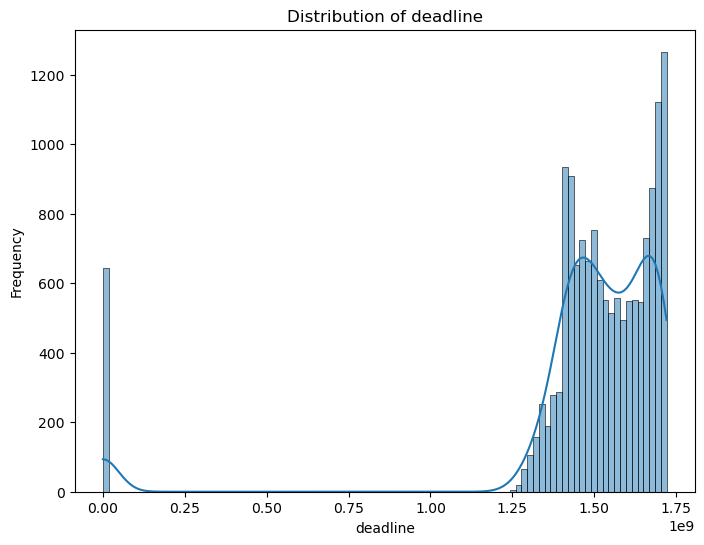

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


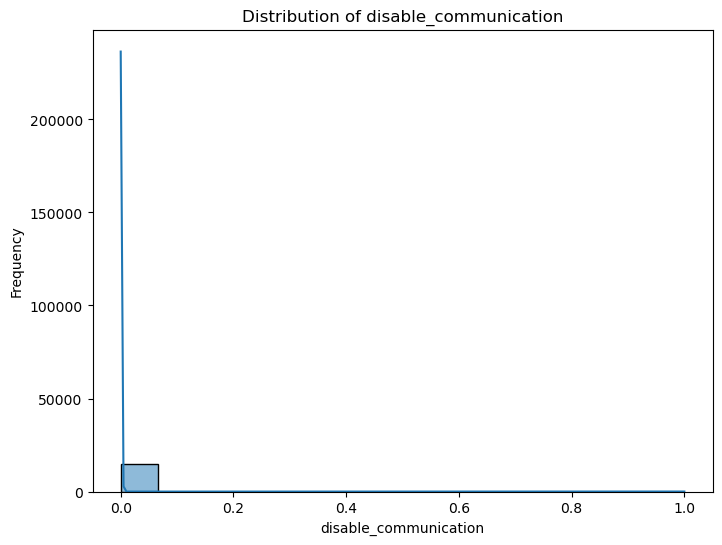

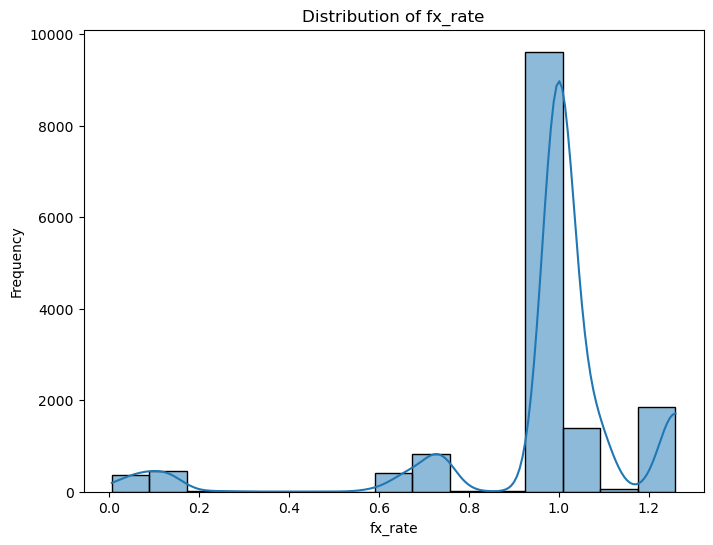

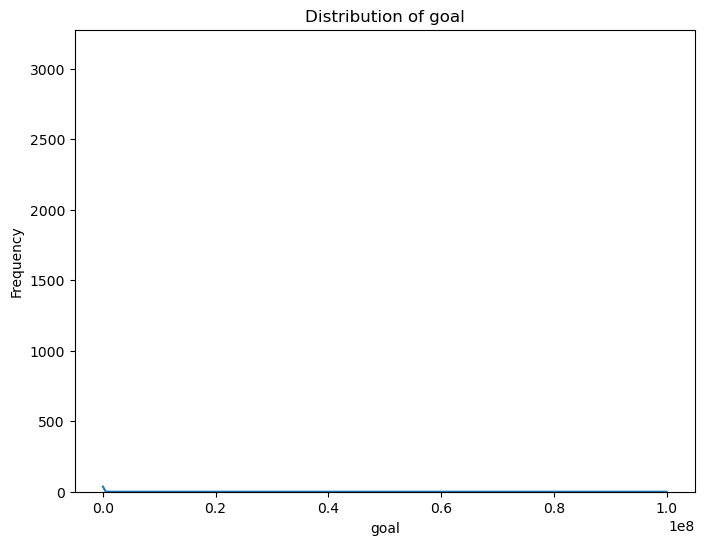

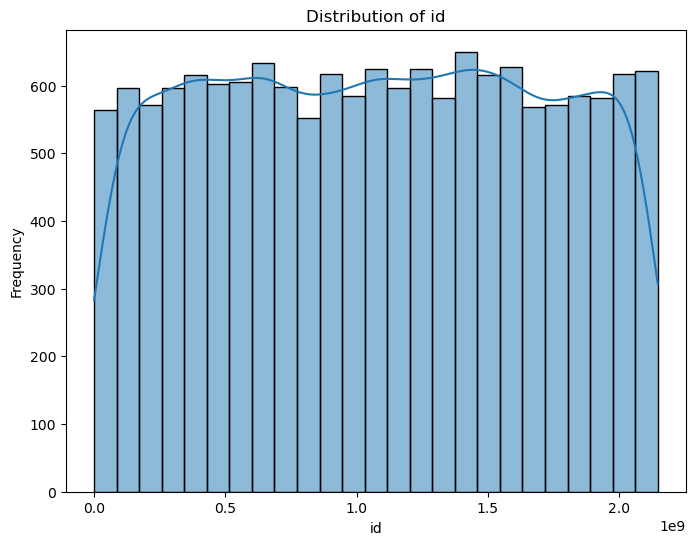

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


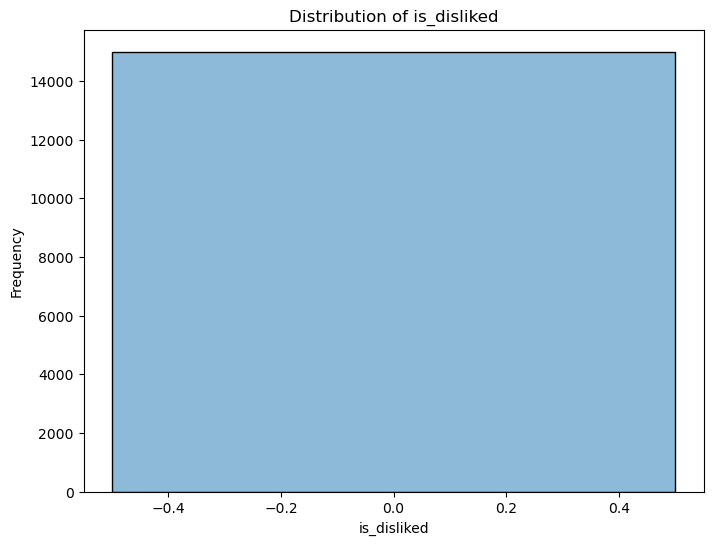

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


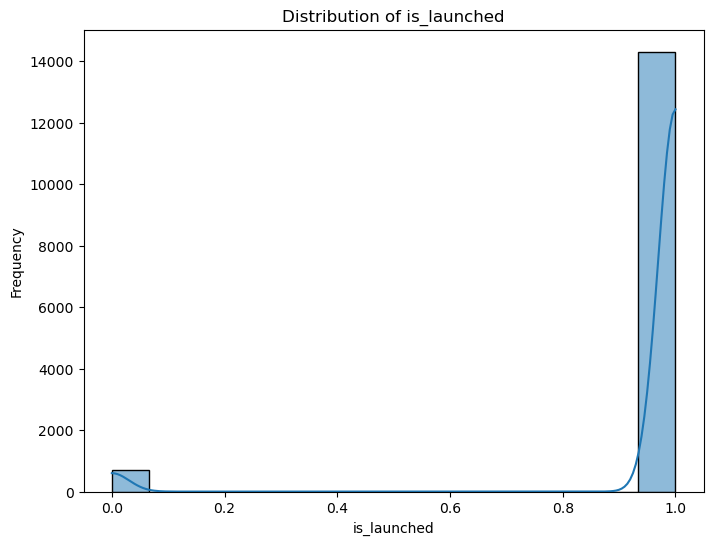

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


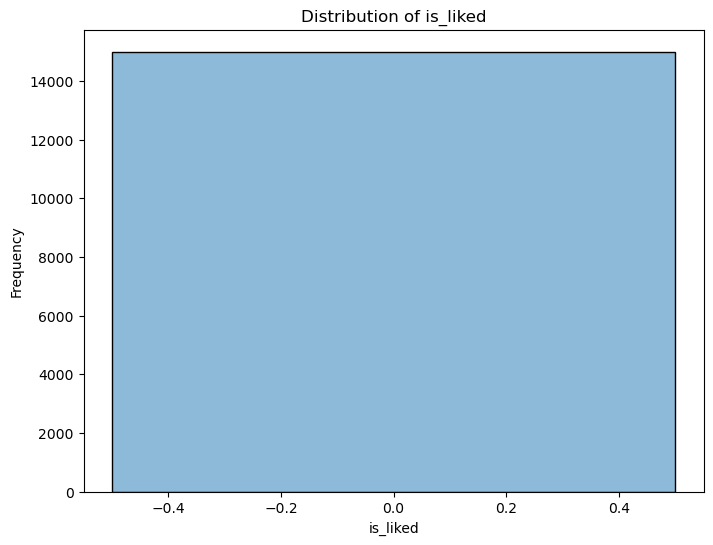

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


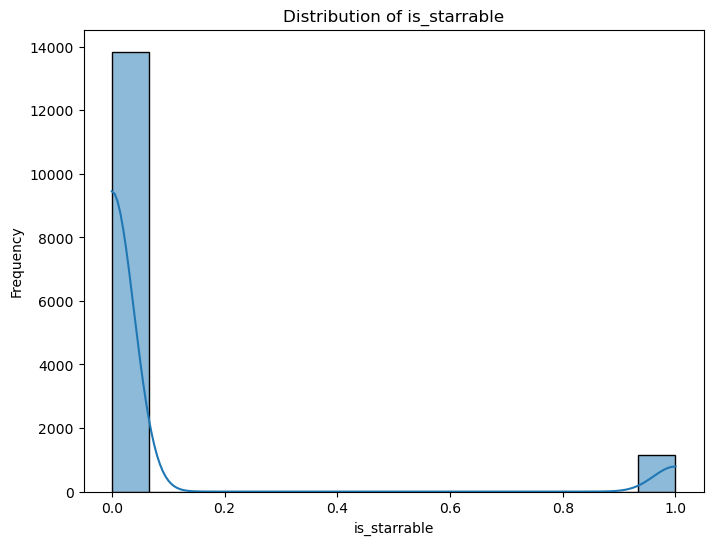

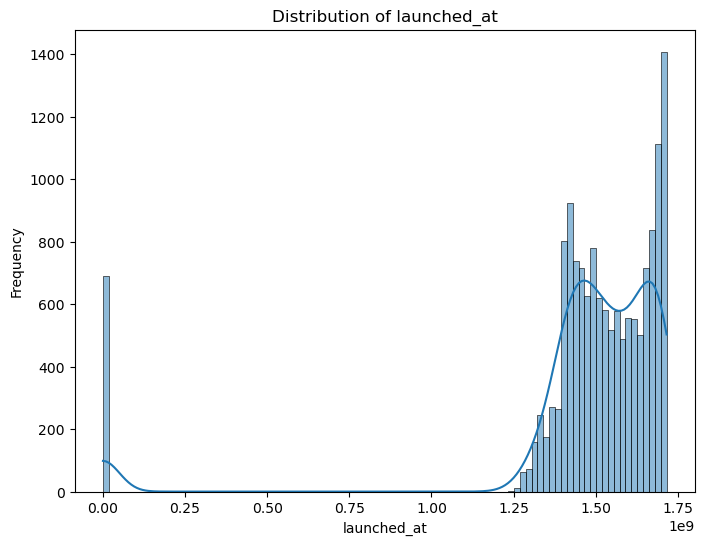

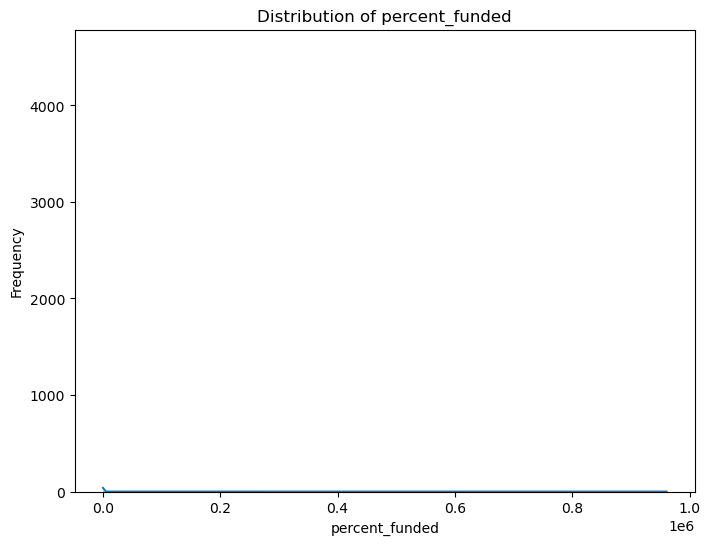

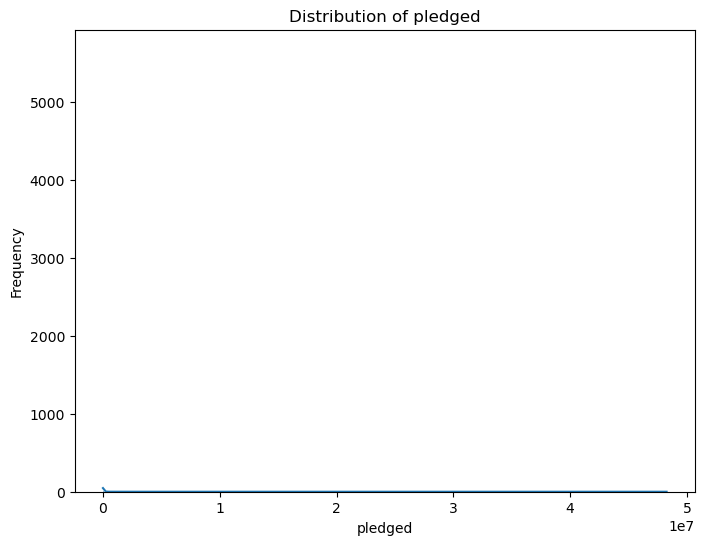

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


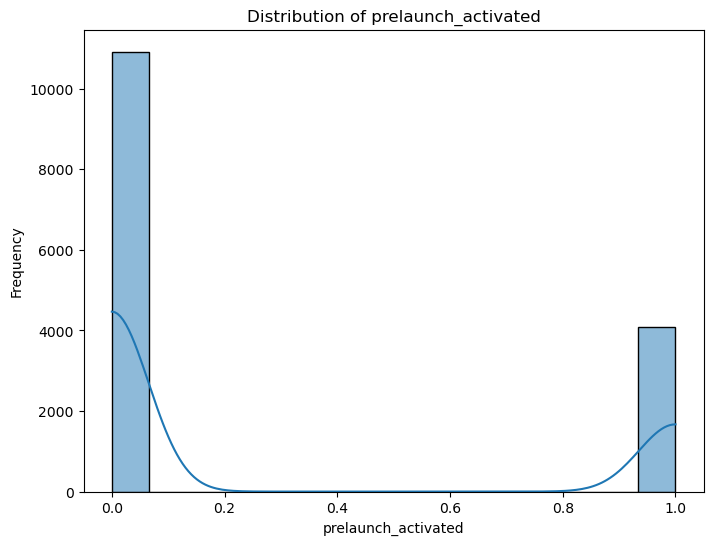

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


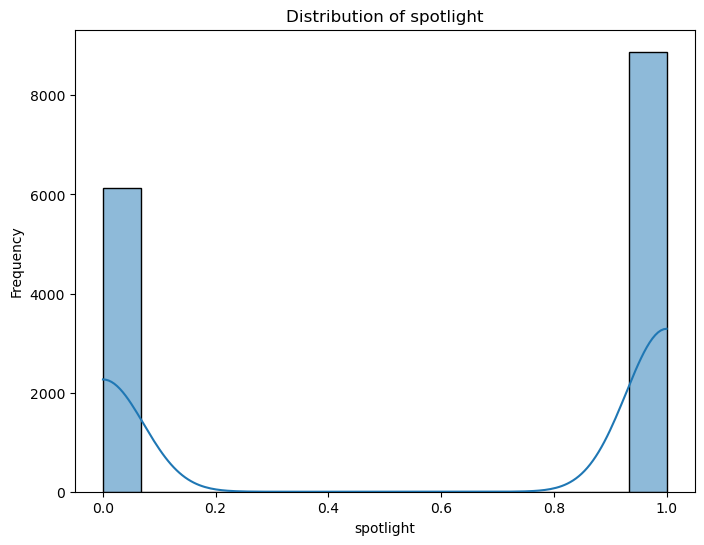

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


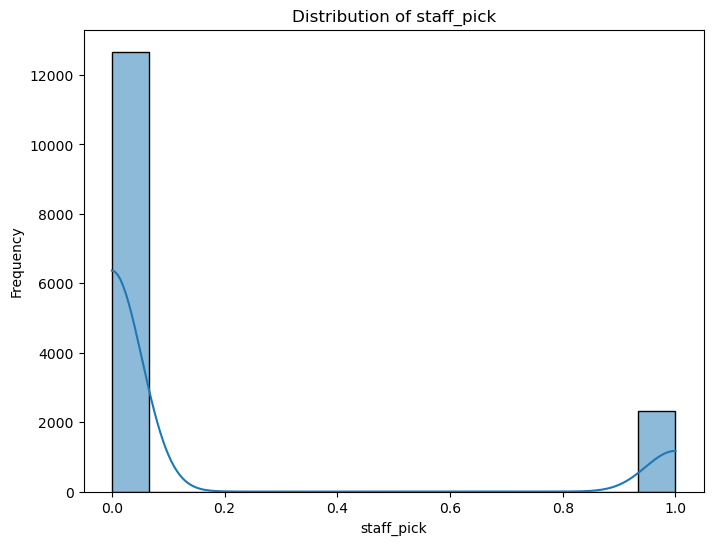

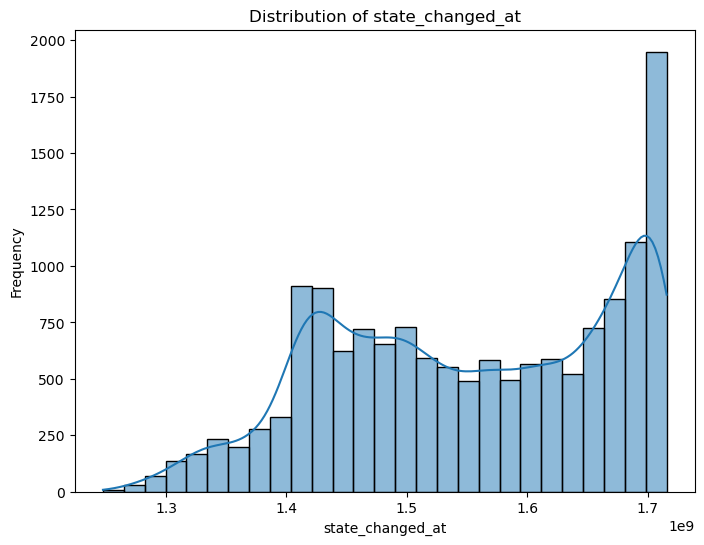

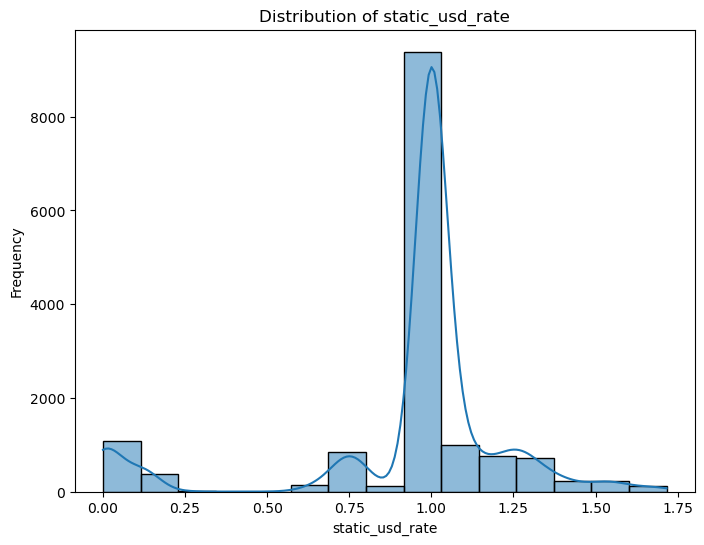

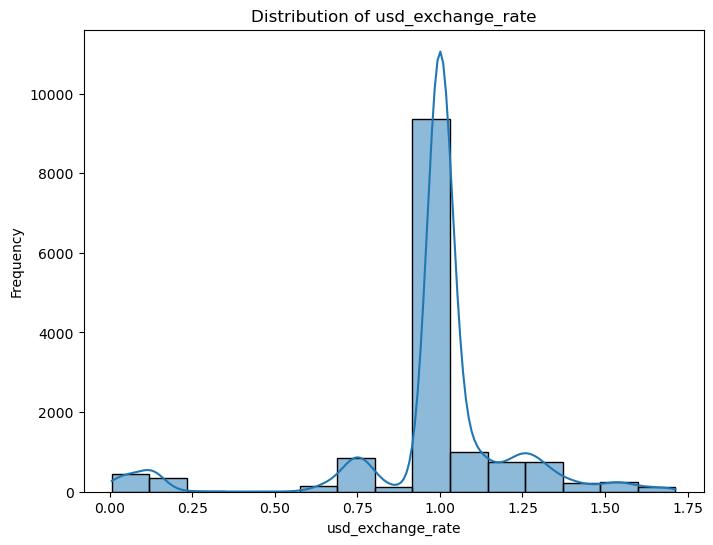

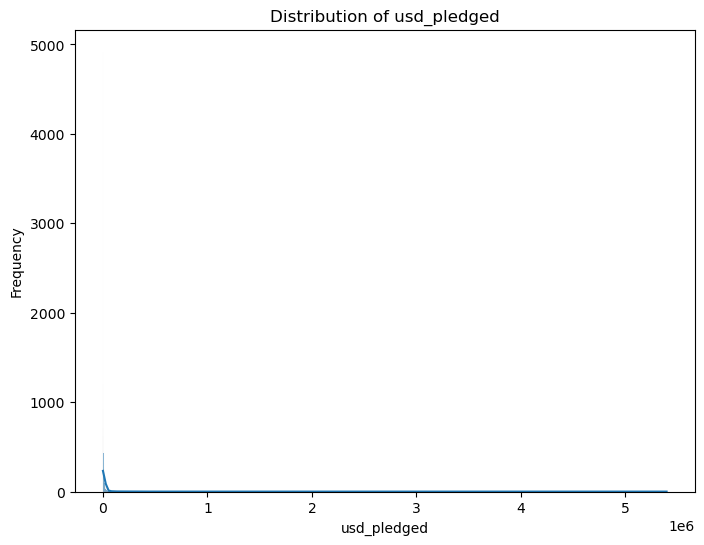

In [3]:
# Univariate Analysis
for column in merged_df.columns:
    if merged_df[column].dtype != 'object':  # Plot only numerical columns
        plt.figure(figsize=(8, 6))
        sns.histplot(merged_df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

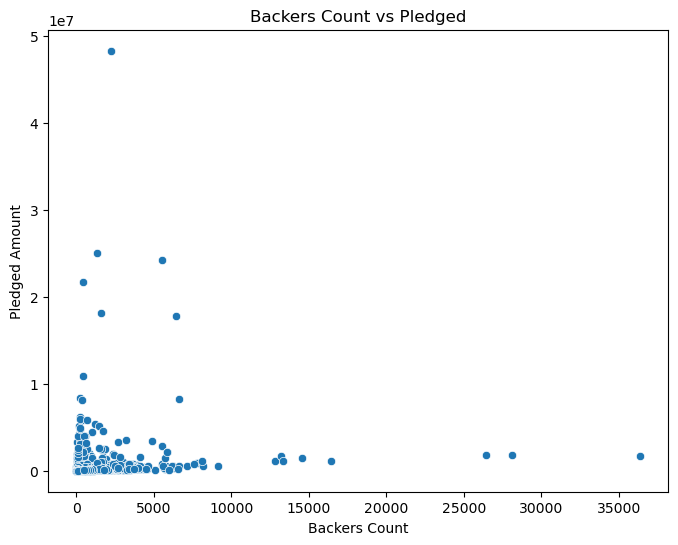

In [4]:

# Bivariate Analysis (example: backers_count vs pledged)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x='backers_count', y='pledged')
plt.title('Backers Count vs Pledged')
plt.xlabel('Backers Count')
plt.ylabel('Pledged Amount')
plt.show()

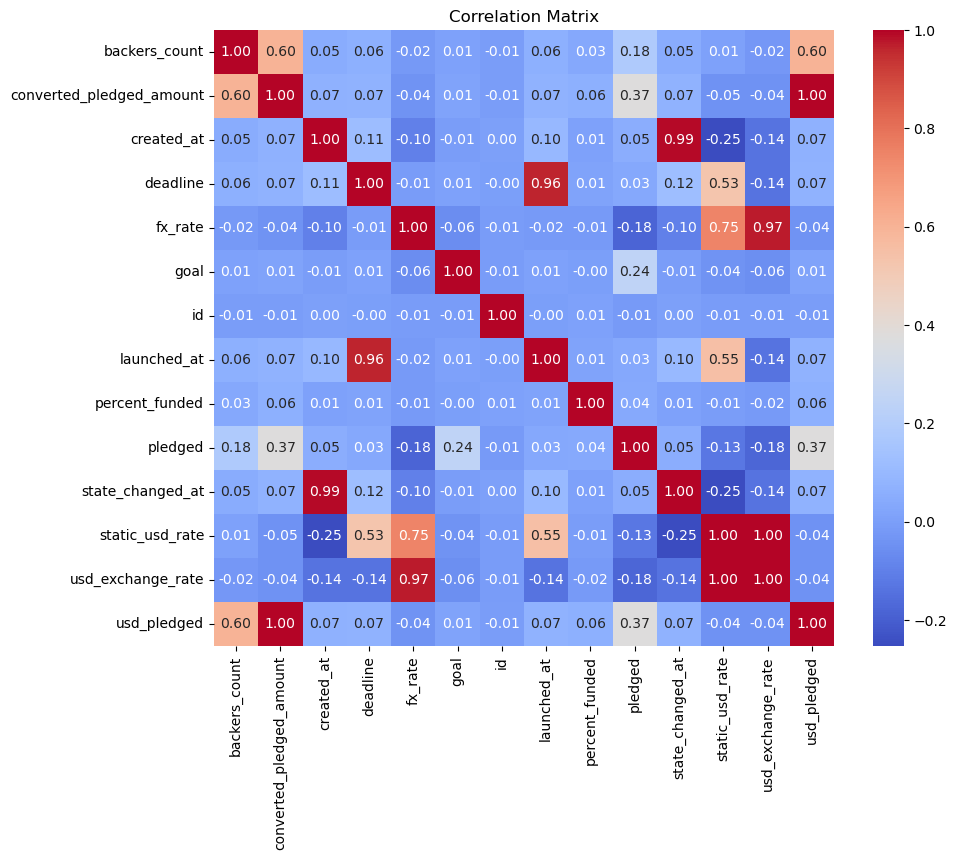

In [5]:
# Filter out non-numeric columns
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [6]:
# Count the number of campaigns with and without videos
total_campaigns = len(merged_df)
campaigns_with_video_count = merged_df['video'].notnull().sum()
campaigns_without_video_count = total_campaigns - campaigns_with_video_count

print("Number of Campaigns:")
print(f"With Video: {campaigns_with_video_count}")
print(f"Without Video: {campaigns_without_video_count}")

# Analyze success rates
video_campaign_success_rate = merged_df[merged_df['video'].notnull()]['state'].value_counts(normalize=True)
no_video_campaign_success_rate = merged_df[merged_df['video'].isnull()]['state'].value_counts(normalize=True)

print("\nSuccess Rate for Campaigns with Video:")
print(video_campaign_success_rate)

print("\nSuccess Rate for Campaigns without Video:")
print(no_video_campaign_success_rate)


Number of Campaigns:
With Video: 9711
Without Video: 5289

Success Rate for Campaigns with Video:
state
successful    0.679024
failed        0.253527
canceled      0.033261
live          0.032540
started       0.001442
suspended     0.000206
Name: proportion, dtype: float64

Success Rate for Campaigns without Video:
state
successful    0.432218
failed        0.356967
submitted     0.124598
canceled      0.053507
live          0.029873
started       0.002836
Name: proportion, dtype: float64


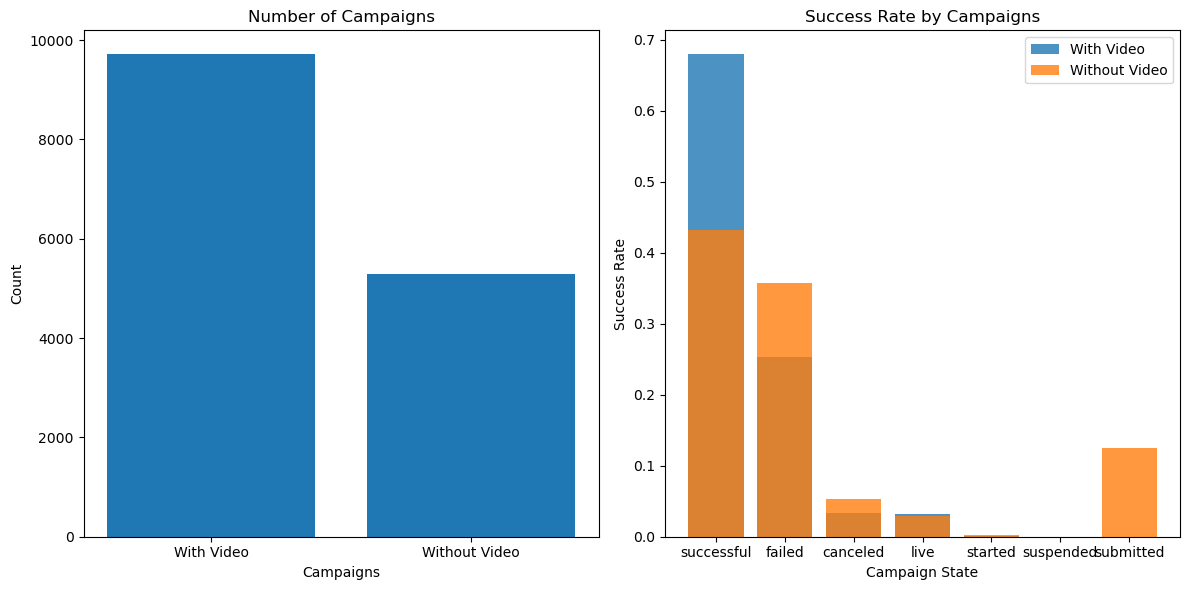

In [7]:
import matplotlib.pyplot as plt

# Define colors
colors = ['#1f77b4', '#ff7f0e']

# Count the number of campaigns with and without videos
total_campaigns = len(merged_df)
campaigns_with_video_count = merged_df['video'].notnull().sum()
campaigns_without_video_count = total_campaigns - campaigns_with_video_count

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for number of campaigns
plt.subplot(1, 2, 1)
plt.bar(['With Video', 'Without Video'], [campaigns_with_video_count, campaigns_without_video_count], color=colors[0:1])
plt.title('Number of Campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Count')

# Analyze success rates
video_campaign_success_rate = merged_df[merged_df['video'].notnull()]['state'].value_counts(normalize=True)
no_video_campaign_success_rate = merged_df[merged_df['video'].isnull()]['state'].value_counts(normalize=True)

# Bar plot for success rates
plt.subplot(1, 2, 2)
plt.bar(video_campaign_success_rate.index, video_campaign_success_rate.values, alpha=0.8, color=colors[0], label='With Video')
plt.bar(no_video_campaign_success_rate.index, no_video_campaign_success_rate.values, alpha=0.8, color=colors[1], label='Without Video')
plt.title('Success Rate by Campaigns')
plt.xlabel('Campaign State')
plt.ylabel('Success Rate')
plt.legend()

plt.tight_layout()
plt.show()


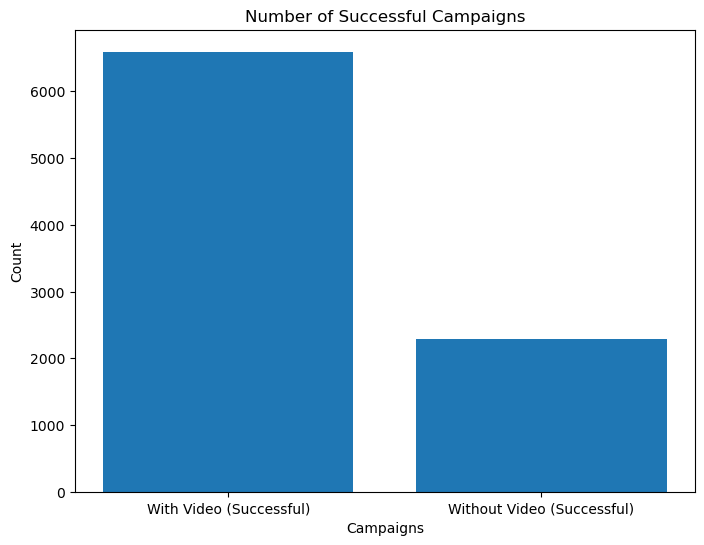

In [8]:
import matplotlib.pyplot as plt

# Define colors
colors = ['#1f77b4']

# Count the number of successful campaigns with and without videos
successful_with_video_count = merged_df[(merged_df['video'].notnull()) & (merged_df['state'] == 'successful')].shape[0]
successful_without_video_count = merged_df[(merged_df['video'].isnull()) & (merged_df['state'] == 'successful')].shape[0]

# Plotting
plt.figure(figsize=(8, 6))

# Bar plot for number of successful campaigns with and without videos
plt.bar(['With Video (Successful)', 'Without Video (Successful)'], [successful_with_video_count, successful_without_video_count], color=colors)
plt.title('Number of Successful Campaigns')
plt.xlabel('Campaigns')
plt.ylabel('Count')

plt.show()


In [9]:
## Dropping Columns 
columns_to_drop = ['converted_pledged_amount', 'country_displayable_name', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'static_usd_rate', 'usd_exchange_rate', 'usd_pledged', 'usd_type']

merged_df.drop(columns=columns_to_drop, inplace=True)


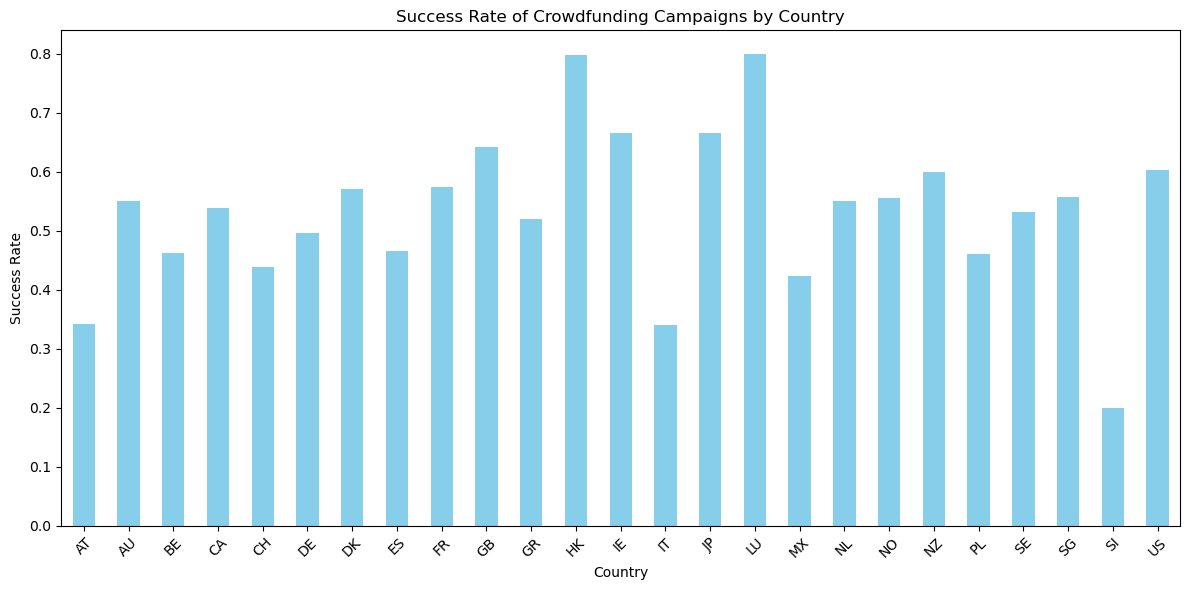

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate success rate for each country
success_rate_per_country = merged_df.groupby('country')['state'].apply(lambda x: (x == 'successful').mean())

# Create bar chart
plt.figure(figsize=(12, 6))
success_rate_per_country.plot(kind='bar', color='skyblue')
plt.title('Success Rate of Crowdfunding Campaigns by Country')
plt.xlabel('Country')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

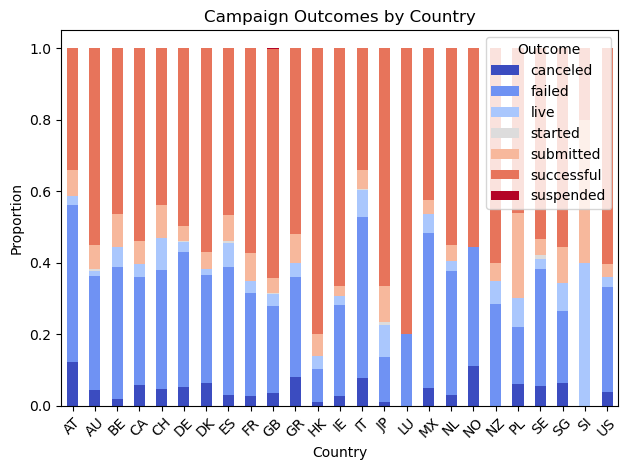

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'merged_df' contains the dataset with information about crowdfunding campaigns

# Calculate the total number of campaigns for each country
total_campaigns_per_country = merged_df['country'].value_counts()

# Calculate the number of successful, failed, suspended, and other campaigns for each country
campaign_outcomes_per_country = merged_df.groupby(['country', 'state']).size().unstack(fill_value=0)

# Calculate the success rate for each country
success_rate_per_country = campaign_outcomes_per_country['successful'] / total_campaigns_per_country

# Create stacked bar chart
plt.figure(figsize=(12, 6))
campaign_outcomes_per_country.div(total_campaigns_per_country, axis=0).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('Campaign Outcomes by Country')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()


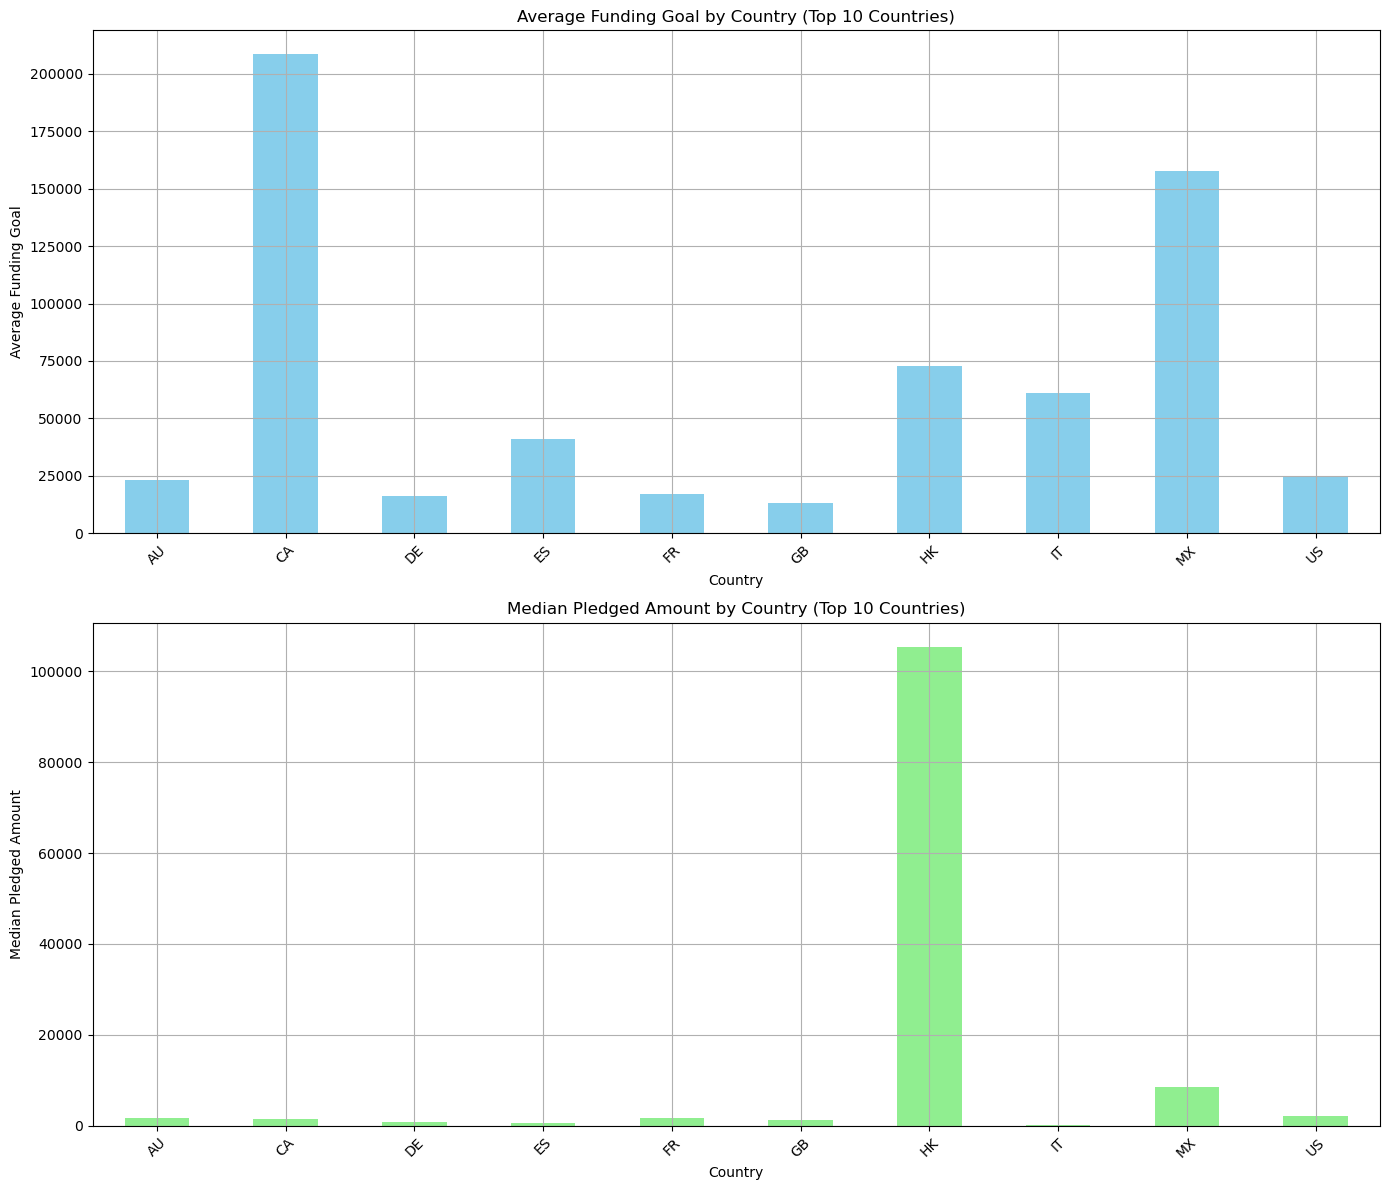

In [12]:
import matplotlib.pyplot as plt

# Define the number of top countries to display
N = 10

# Calculate the number of campaigns per country
campaigns_per_country = merged_df['country'].value_counts()

# Select the top N countries
top_countries = campaigns_per_country.nlargest(N).index

# Filter the dataset for only the top N countries
filtered_df = merged_df[merged_df['country'].isin(top_countries)]

# Calculate average goal for each of the top N countries
average_goal_per_country = filtered_df.groupby('country')['goal'].mean()

# Calculate median pledged amount for each of the top N countries
median_pledged_per_country = filtered_df.groupby('country')['pledged'].median()

# Create subplots for average goal and median pledged amount
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Plot average goal
average_goal_per_country.plot(kind='bar', ax=axs[0], color='skyblue', grid=True)
axs[0].set_title('Average Funding Goal by Country (Top 10 Countries)')
axs[0].set_xlabel('Country')
axs[0].set_ylabel('Average Funding Goal')
axs[0].tick_params(axis='x', rotation=45)

# Plot median pledged amount
median_pledged_per_country.plot(kind='bar', ax=axs[1], color='lightgreen', grid=True)
axs[1].set_title('Median Pledged Amount by Country (Top 10 Countries)')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Median Pledged Amount')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


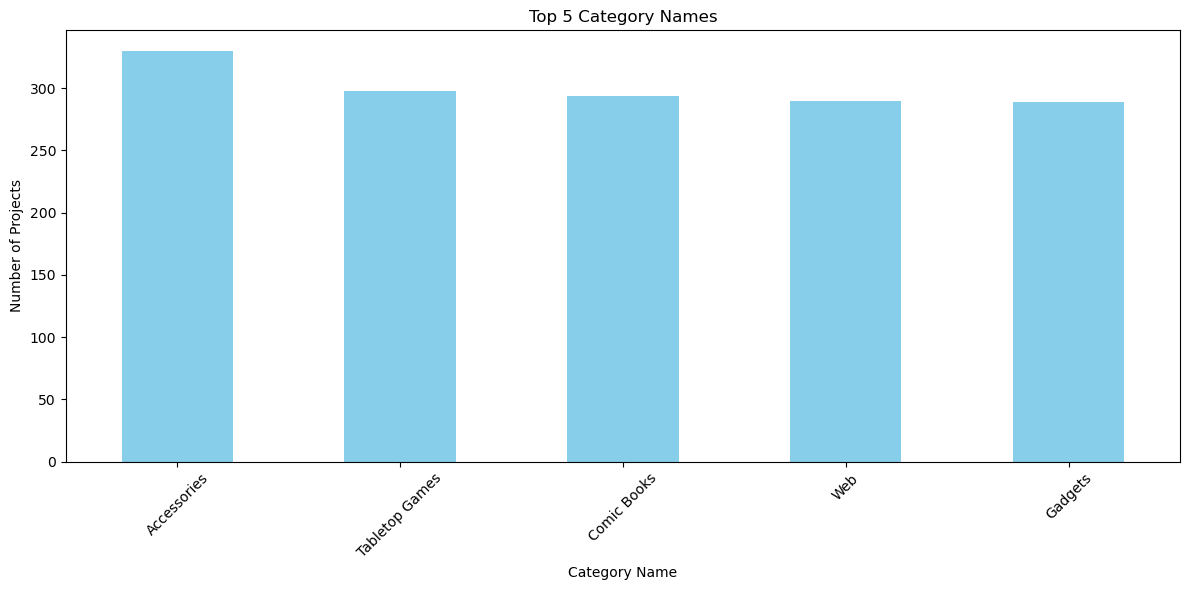

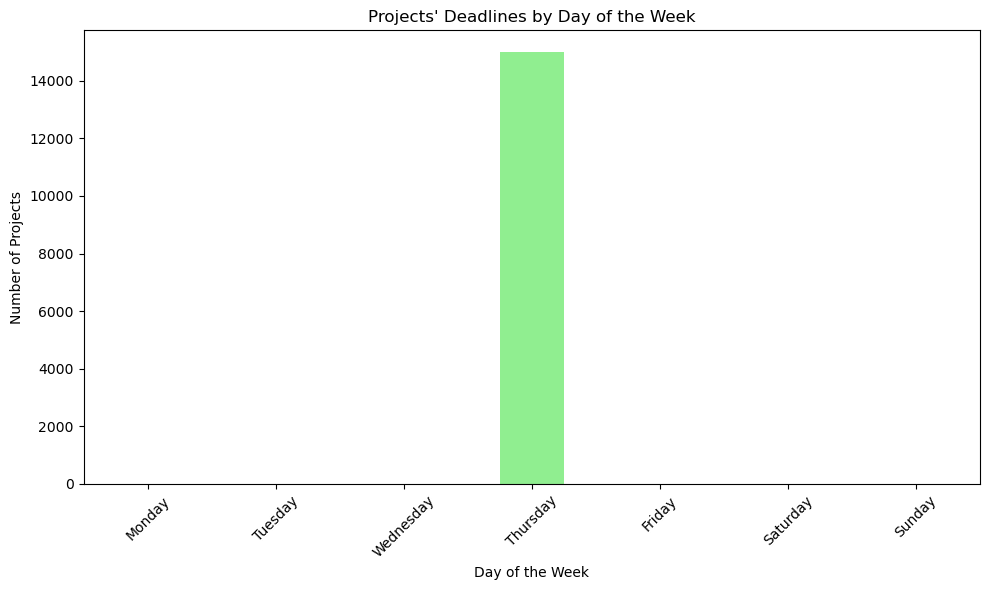

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Convert JSON strings in 'category' column to dictionaries and extract names
merged_df['category_name'] = merged_df['category'].apply(lambda x: json.loads(x)['name'])

# Convert 'deadline' column to datetime
merged_df['deadline'] = pd.to_datetime(merged_df['deadline'])

# Top 5 Category Names
plt.figure(figsize=(12, 6))
top_category_names = merged_df['category_name'].value_counts().head(5)  # Selecting top 5 category names
top_category_names.plot(kind='bar', color='skyblue')
plt.title('Top 5 Category Names')
plt.xlabel('Category Name')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Projects' Deadlines by Day of the Week
plt.figure(figsize=(10, 6))
deadline_day_counts = merged_df['deadline'].dt.day_name().value_counts()
deadline_day_counts = deadline_day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
deadline_day_counts.plot(kind='bar', color='lightgreen')
plt.title("Projects' Deadlines by Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [15]:
merged_df['category'][0]

'{"id":40,"name":"Indie Rock","analytics_name":"Indie Rock","slug":"music/indie rock","position":9,"parent_id":14,"parent_name":"Music","color":10878931,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/music/indie%20rock"}}}'

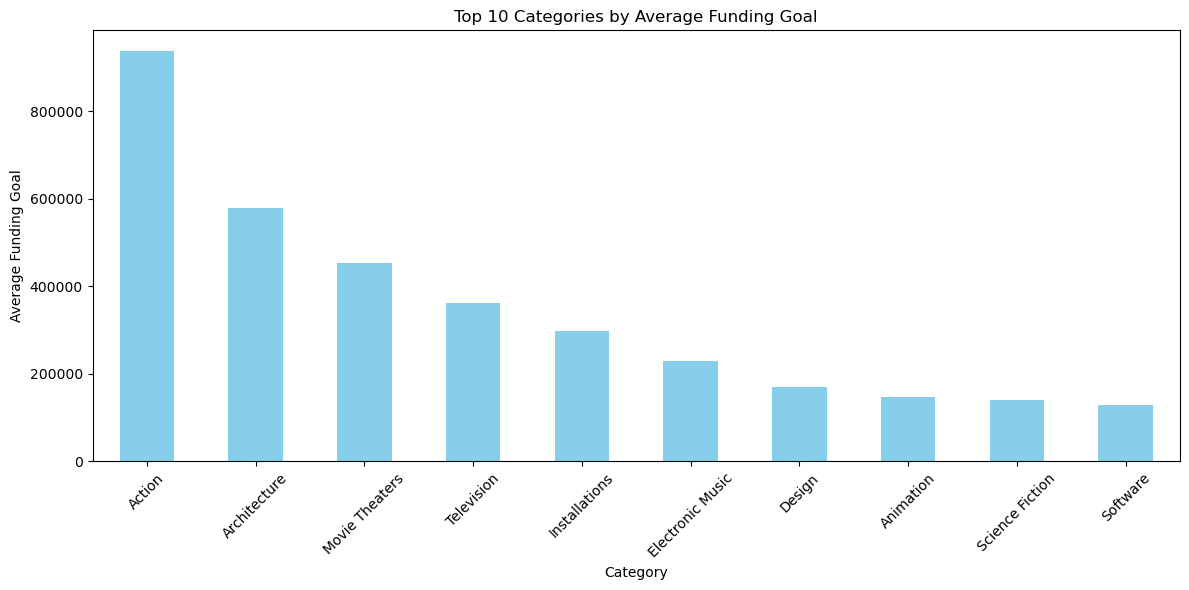

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Assuming 'merged_df' contains the dataset with information about crowdfunding campaigns

# Convert JSON strings in 'category' column to dictionaries and extract names
merged_df['category_name'] = merged_df['category'].apply(lambda x: json.loads(x)['name'])

# Calculate the average funding goal for each category
average_goal_per_category = merged_df.groupby('category_name')['goal'].mean()

# Select top 10 categories by average funding goal
top_10_categories = average_goal_per_category.nlargest(10)

# Create bar chart for top 10 categories by average funding goal
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Average Funding Goal')
plt.xlabel('Category')
plt.ylabel('Average Funding Goal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


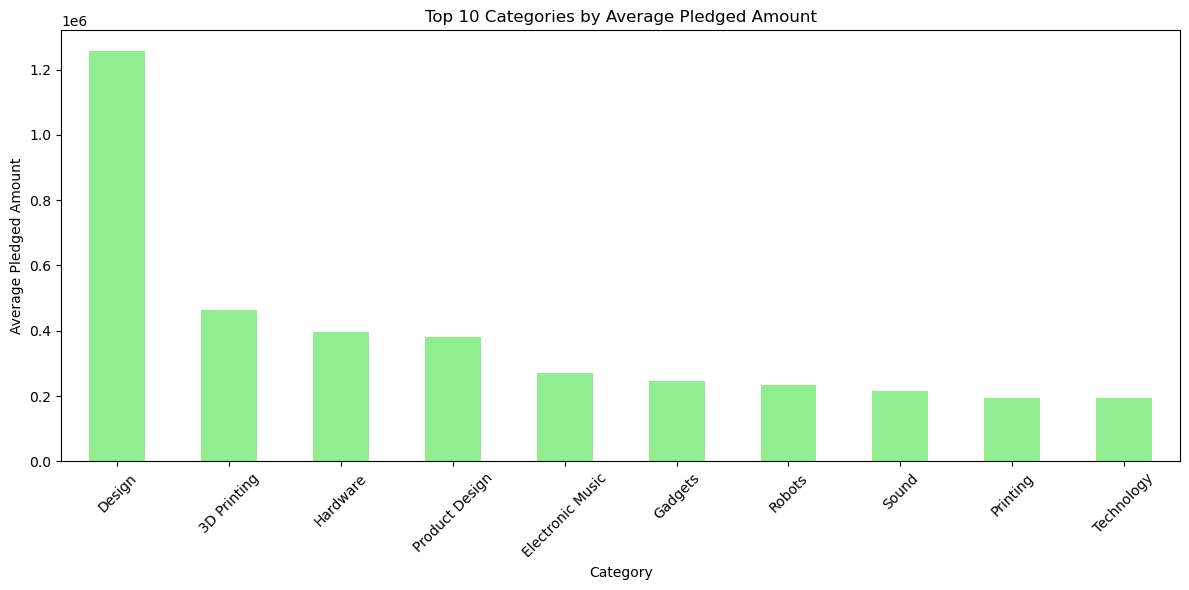

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# Assuming 'merged_df' contains the dataset with information about crowdfunding campaigns

# Convert JSON strings in 'category' column to dictionaries and extract names
merged_df['category_name'] = merged_df['category'].apply(lambda x: json.loads(x)['name'])

# Calculate the average pledged amount for each category
average_pledged_per_category = merged_df.groupby('category_name')['pledged'].mean()

# Select top 10 categories by average pledged amount
top_10_categories = average_pledged_per_category.nlargest(10)

# Create bar chart for top 10 categories by average pledged amount
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Categories by Average Pledged Amount')
plt.xlabel('Category')
plt.ylabel('Average Pledged Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
